<a href="https://colab.research.google.com/github/Mehulgoyal353/CODSOFT/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and analysing the dataset

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
titanic = pd.read_csv("/content/Titanic-Dataset.csv")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

In [10]:
titanic_df = titanic.copy()

In [11]:
# Fill missing Age values with median
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
# Fill missing Embarked values with mode
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])
# Apply log1p to Age
titanic_df['log_age'] = np.log1p(titanic_df['Age'])
# Apply log1p to Fare
titanic_df['log_fare'] = np.log1p(titanic_df['Fare'])

In [12]:
sns.set_style("whitegrid")

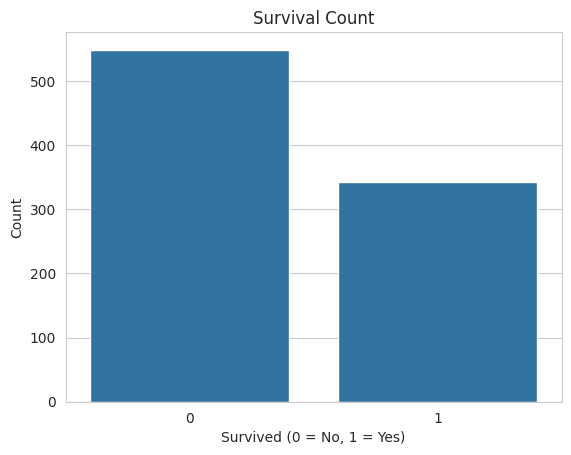

In [13]:
sns.countplot(x='Survived', data=titanic_df)
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

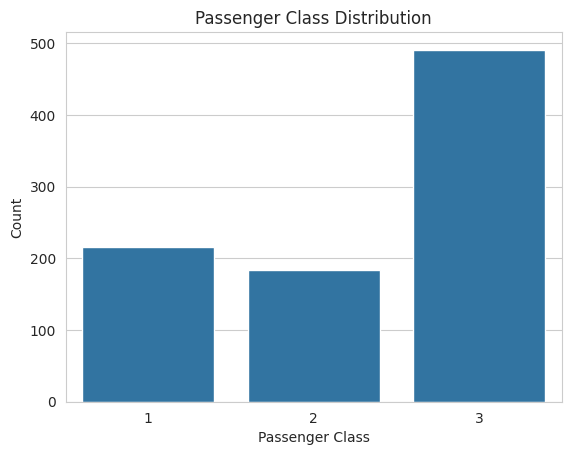

In [14]:
sns.countplot(x='Pclass', data=titanic_df)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passenger Class Distribution')
plt.show()

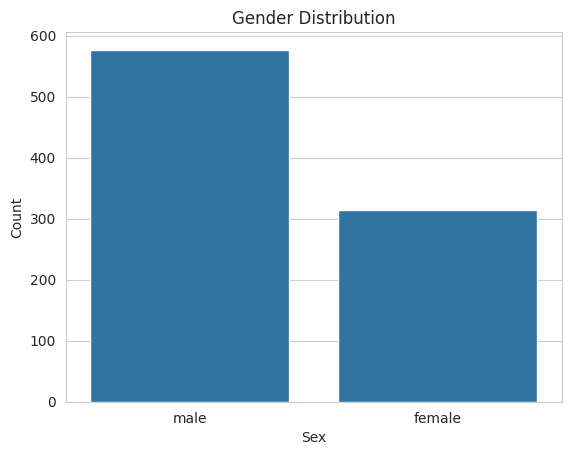

In [15]:
sns.countplot(x='Sex', data=titanic_df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

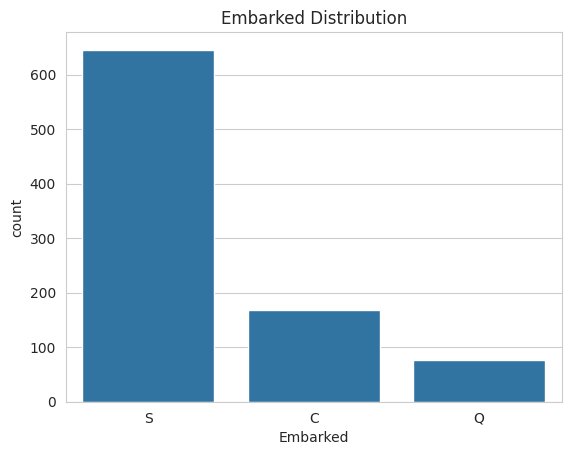

In [16]:
sns.countplot(x='Embarked', data=titanic_df)
plt.title('Embarked Distribution')
plt.show()

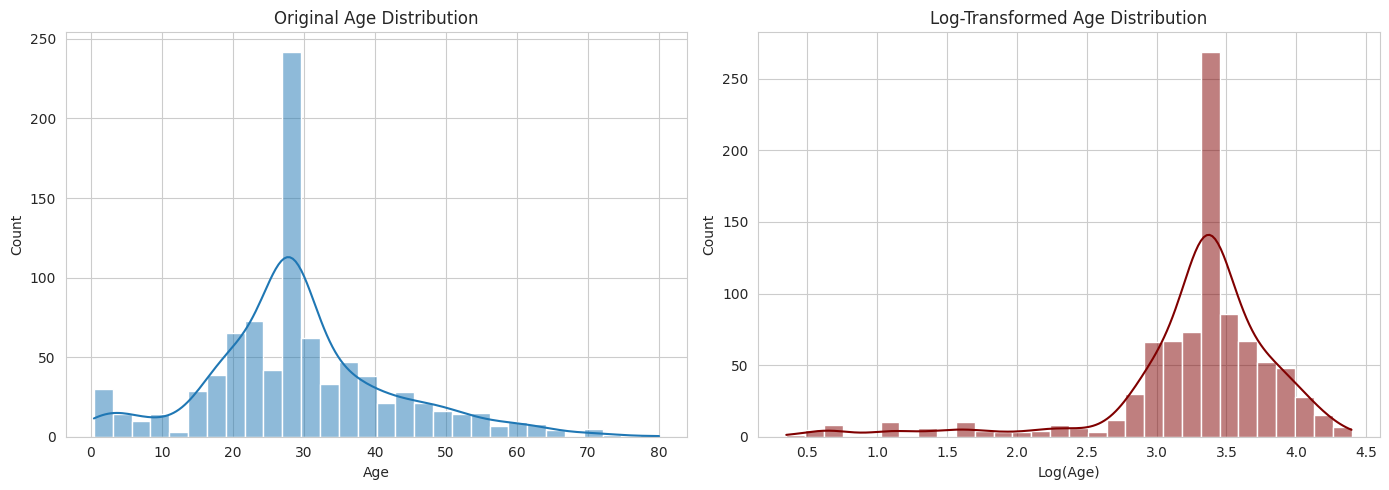

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original Age distribution
sns.histplot(titanic_df['Age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Original Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Log-transformed Age distribution
sns.histplot(titanic_df['log_age'], bins=30, kde=True, ax=axes[1], color='maroon')
axes[1].set_title('Log-Transformed Age Distribution')
axes[1].set_xlabel('Log(Age)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

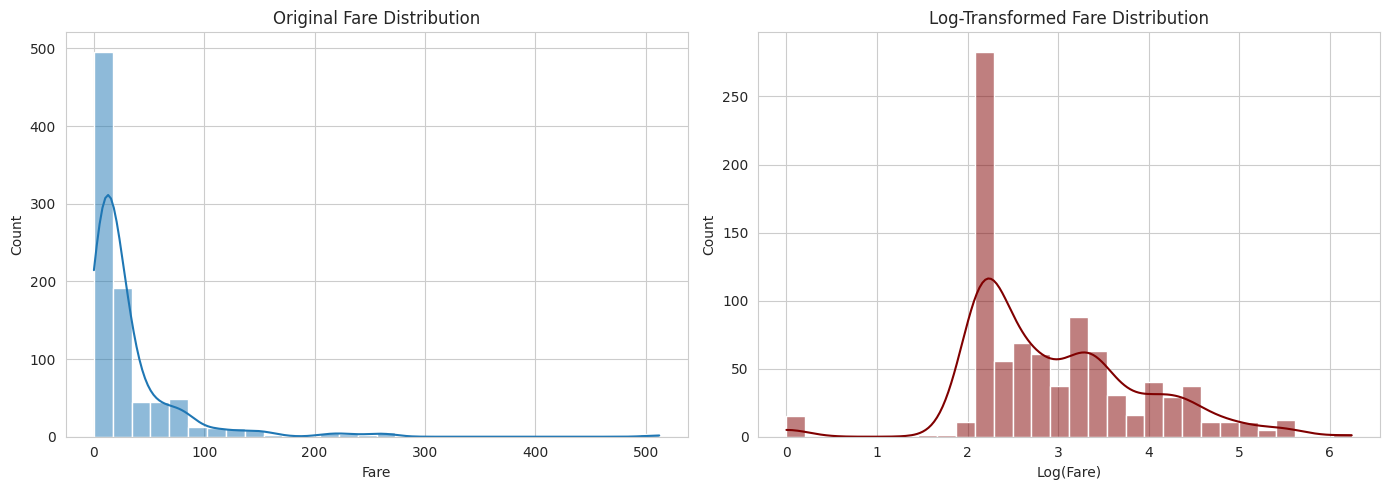

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original Fare Distribution
sns.histplot(titanic_df['Fare'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Original Fare Distribution')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Count')

# Log-Transformed Fare Distribution
sns.histplot(titanic_df['log_fare'], bins=30, kde=True, ax=axes[1], color="maroon")
axes[1].set_title('Log-Transformed Fare Distribution')
axes[1].set_xlabel('Log(Fare)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

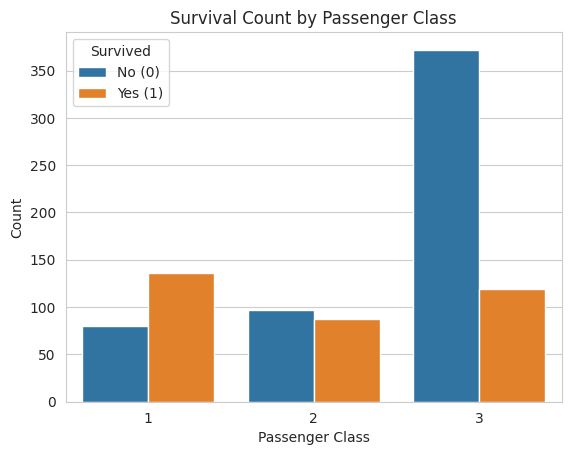

In [19]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
plt.show()

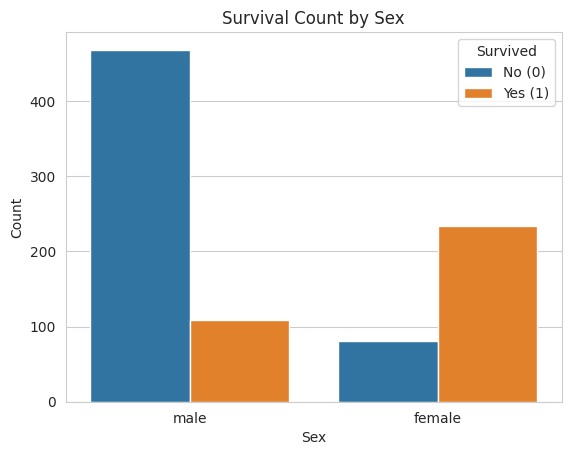

In [20]:
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
plt.show()

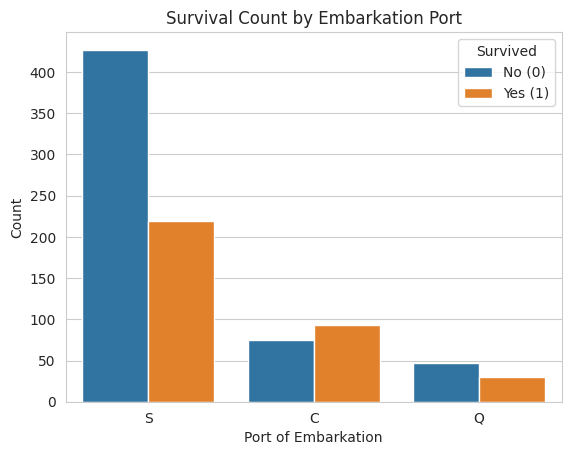

In [21]:
sns.countplot(x='Embarked', hue='Survived', data=titanic_df)
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.title('Survival Count by Embarkation Port')
plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
plt.show()

In [22]:
# Dropping Irrelevant Columns
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
titanic_df.drop(['Age', 'Fare'], axis=1, inplace=True)
titanic_df.drop('Cabin', axis=1, inplace=True)

In [23]:
# Encoding Categorical Variables
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

In [24]:
# Feature Engineering
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [25]:
# Split Features & Target
titanic_features  = titanic_df.drop('Survived', axis=1)
titanic_target  = titanic_df['Survived']

In [26]:
# Spliting into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(titanic_features, titanic_target, test_size=0.2, random_state=42)

In [27]:
# Scaling Numerical Features
scaler = StandardScaler()
numerical_cols = ['Pclass','log_age', 'log_fare', 'SibSp', 'Parch', 'FamilySize']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [28]:
# Verifying shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 9)
X_test shape: (179, 9)
y_train shape: (712,)
y_test shape: (179,)


In [29]:
# Tune SGDClassifier
param_grid = {'alpha': [0.0001, 0.001, 0.01], 'max_iter': [1000, 2000]}
sgd_clf = SGDClassifier(loss='log_loss', class_weight='balanced', random_state=42)
grid_search = GridSearchCV(sgd_clf, param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)
sgd_clf = grid_search.best_estimator_
print("Best SGD params:", grid_search.best_params_)

Best SGD params: {'alpha': 0.01, 'max_iter': 1000}


In [30]:
# Train and evaluate SGD
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
print("SGD F1-Score:", f1_score(y_train, y_train_pred_sgd))

SGD F1-Score: 0.7385159010600707


In [31]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.78991597, 0.78481013, 0.80168776])

In [32]:
# Confusion Matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [33]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[355,  89],
       [ 59, 209]])

In [34]:
y_train_perfect_predictions = y_train # Pretend the model predicts perfectly
confusion_matrix(y_train, y_train_perfect_predictions)

array([[444,   0],
       [  0, 268]])

In [35]:
display(Math(r'\text{Precision} = \frac{TP}{TP + FP}'))

<IPython.core.display.Math object>

In [37]:
precision_score(y_train, y_train_pred)

0.7013422818791947

In [38]:
display(Math(r'\text{Recall} = \frac{TP}{TP + FN}'))


<IPython.core.display.Math object>

In [39]:
recall_score(y_train, y_train_pred)


0.7798507462686567

In [40]:
f1_score(y_train, y_train_pred)

0.7385159010600707

In [41]:
log_reg = LogisticRegression(random_state=42,)
log_reg.fit(X_train, y_train)
y_train_pred_log = cross_val_predict(log_reg, X_train, y_train, cv=3)
print("Logistic Regression F1-Score:", f1_score(y_train, y_train_pred_log))

Logistic Regression F1-Score: 0.7201565557729941


In [42]:
# Tune LogisticRegression
param_grid = {'C': [0.01, 0.1, 1, 10]}
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)
log_reg = grid_search.best_estimator_
print("Best Logistic params:", grid_search.best_params_)

Best Logistic params: {'C': 0.1}


In [43]:
# Evaluate LogisticRegression
y_train_pred_log = cross_val_predict(log_reg, X_train, y_train, cv=3)
print("Logistic Regression Train F1-Score:", f1_score(y_train, y_train_pred_log))
y_test_pred_log = log_reg.predict(X_test)
print("Logistic Regression Test F1-Score:", f1_score(y_test, y_test_pred_log))

Logistic Regression Train F1-Score: 0.7447552447552448
Logistic Regression Test F1-Score: 0.7730061349693251


In [44]:
# Tuned random forest
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5]}
rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)
rf_clf = grid_search.best_estimator_
print("Best RF params:", grid_search.best_params_)

Best RF params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}


In [45]:
# Cross-validate
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
y_train_pred_balanced = cross_val_predict(rf_balanced, X_train, y_train, cv=3)
print("Balanced Default RF Train F1-Score:", f1_score(y_train, y_train_pred_balanced))

Balanced Default RF Train F1-Score: 0.7117988394584139


In [46]:
# Cross-validate tuned model
y_train_pred_rf = cross_val_predict(rf_clf, X_train, y_train, cv=3)
print("Tuned RF Train F1-Score:", f1_score(y_train, y_train_pred_rf))

Tuned RF Train F1-Score: 0.7489878542510121


In [47]:
# Test set evaluation
y_test_pred_rf = rf_clf.predict(X_test)
print("Tuned RF Test F1-Score:", f1_score(y_test, y_test_pred_rf))
print("Test Precision:", precision_score(y_test, y_test_pred_rf))
print("Test Recall:", recall_score(y_test, y_test_pred_rf))

Tuned RF Test F1-Score: 0.7971014492753623
Test Precision: 0.859375
Test Recall: 0.7432432432432432


In [48]:
# Feature Importance
importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_clf.feature_importances_})
print("Random Forest Feature Importance:\n", importances.sort_values(by='Importance', ascending=False))

Random Forest Feature Importance:
       Feature  Importance
1         Sex    0.361325
5    log_fare    0.212868
4     log_age    0.177930
0      Pclass    0.101308
8  FamilySize    0.058806
2       SibSp    0.032653
3       Parch    0.024609
7  Embarked_S    0.021126
6  Embarked_Q    0.009374


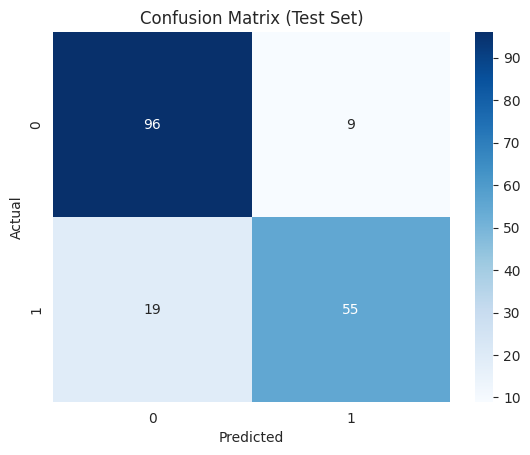

In [49]:
cm = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()